In [1]:
import numpy as np
from numpy.random import rand, randn
from numpy.linalg import lstsq, norm
from scipy.optimize import minimize

# https://www.cvxpy.org/
import cvxpy as cp

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Random data points (25) from [-2, 2] (ordered)
x = np.sort(4*rand(25) - 2)
# Line y = 0.9x with gaussian random noise
b = 0.9*x + 0.1*randn(len(x)) 

# Least-squares slope (no outliers)
(a_true,), *_  = lstsq(x[:, np.newaxis], b, rcond=None)

# Least-squares slope with outlier)
b[-1] = -5.5
(a_corrupt,), *_ = lstsq(x[:, np.newaxis], b, rcond=None)

# L1 optimization to reject outlier using cvxpy
a = cp.Variable()
cp.Problem(
    cp.Minimize(cp.norm1(a*x - b)),
).solve()
a_l1 = a.value # a_l1 is robust

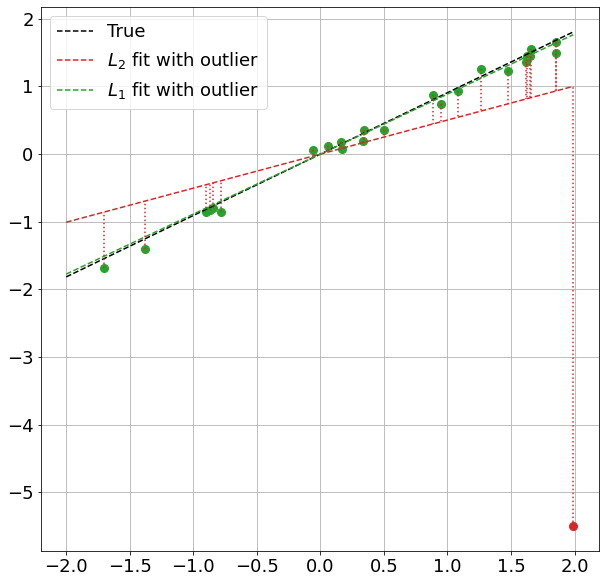

In [3]:
# Figure 3.12 (modified)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x[:-1], b[:-1], 'o', color='C2', ms=8) # Data
ax.plot(x[-1], b[-1], 'o', color='C3', ms=8)   # Outlier

xaxis = np.arange(-2, 2, 0.01)
ax.plot(xaxis, a_true * xaxis, '--', color='black', label='True') # L2 fit (no outlier)
ax.plot(xaxis, a_corrupt * xaxis, '--', color='C3', label='$L_2$ fit with outlier') # L2 fit (outlier)
ax.plot(xaxis, a_l1 * xaxis, '--', color='C2', label='$L_1$ fit with outlier')      # L1 fit
for (x0, b0) in zip(x, b):
    ax.plot([x0, x0], [b0, a_corrupt * x0], linestyle='dotted', color='C3')
ax.grid(True)
ax.legend();